# 

# 

# Medical Cost Personal Insurance Project 

### Project Objective:

This project aims to develop a predictive model for accurately estimating health insurance costs. Health insurance is essential for covering medical expenses resulting from illness, including hospitalization, medications, and doctor consultations, ensuring access to quality healthcare without a significant financial burden. Our model will consider input factors such as age, BMI, number of dependents, smoking status, and geographic region to provide precise insurance cost predictions. By doing so, we aim to empower individuals and insurance providers with a reliable tool to better plan for and manage their healthcare expenses.

# 

# 

## Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings ('ignore')

# 

## Importing Dataset

In [2]:
data=pd.read_csv("Medical.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 

## EDA

In [3]:
data.shape

(1338, 7)

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.isna().sum().sum()

0

### Checking Unique values

In [8]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: age
Unique Values: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


Column: sex
Unique Values: ['female' 'male']


Column: bmi
Unique Values: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17

# 

## Encoding

In [9]:
dt=data.copy()
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
categorical_dt = dt.select_dtypes(include=['object', 'category']).copy()
categorical_dt.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [11]:
for column in categorical_dt.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: sex
Unique Values: male      675
female    662
Name: sex, dtype: int64


Column: smoker
Unique Values: no     1063
yes     274
Name: smoker, dtype: int64


Column: region
Unique Values: southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64




In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
encode_columns = dt.select_dtypes(include=['object'])
for column in encode_columns:
    dt[column] = le.fit_transform(dt[column])

In [14]:
for column in categorical_dt.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: sex
Unique Values: 1    675
0    662
Name: sex, dtype: int64


Column: smoker
Unique Values: 0    1063
1     274
Name: smoker, dtype: int64


Column: region
Unique Values: 2    364
3    325
1    324
0    324
Name: region, dtype: int64




# 

## Checking Distribution

### Selecting Continuous features

In [15]:
continuous_dt = data.select_dtypes(include=['int64','float64']).copy()
continuous_dt.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Plotting Subplot

In [16]:
y = dt['charges']                            
x = dt.drop(columns = ['charges'])

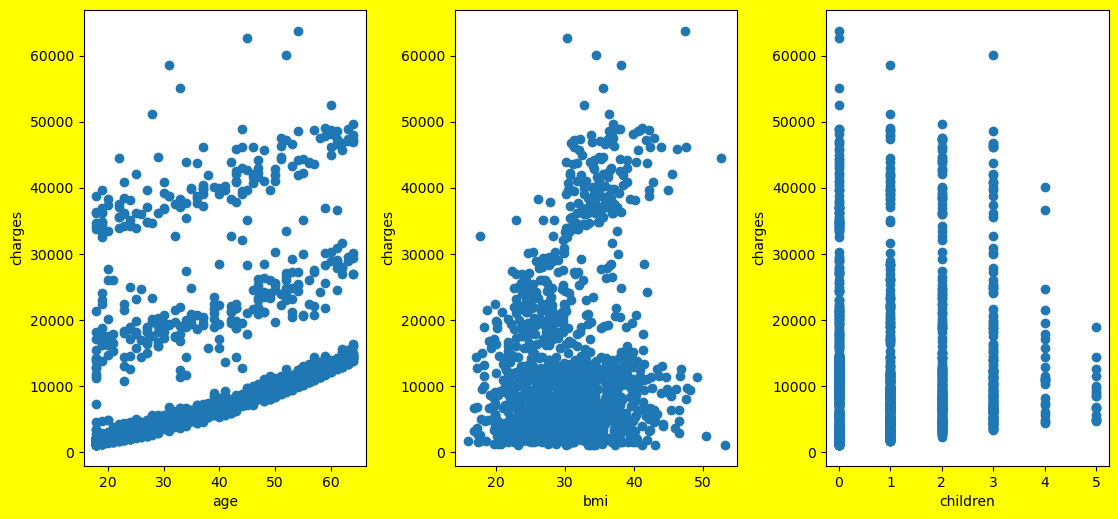

In [17]:
df = continuous_dt.drop(columns=['charges'])

plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=8 :        
        ax = plt.subplot(2,4,plotnumber)     
        plt.scatter(x[column],y)            
        plt.xlabel(column, fontsize=10)           
        plt.ylabel('charges', fontsize=10)        
        
    plotnumber+=1     
plt.tight_layout()      

##### If we see graph, column 'bmi' has no clear relation with column 'charges'. But absence of this features is reducing accuracy, hence we are keeping it.

# 

# 

## Feature Selection

In [18]:
dt.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
dt.shape

(1337, 7)

#### Checking Importance

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

In [21]:
x = dt.drop(columns = ['charges'])
y = dt['charges']

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 24)
rf_model.fit(x,y)
print(f"Score:{rf_model.score(x,y)}")

Score:0.9764891789721292


In [23]:
pd.DataFrame(
    zip(x.columns, abs(rf_model.feature_importances_)),
    columns=["feature", "importance"],
).sort_values("importance").reset_index(drop=True)

,feature,importance
0,sex,0.006213
1,region,0.013407
2,children,0.018733
3,age,0.128734
4,bmi,0.211259
5,smoker,0.621653


##### Keeping all features

# 

# 

## Checking Multi-colinearity

In [24]:
corr = dt.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


In [25]:
vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif

,VIF Scores,variables
0,7.558005,age
1,2.000028,sex
2,10.378567,bmi
3,1.802019,children
4,1.257118,smoker
5,2.924245,region


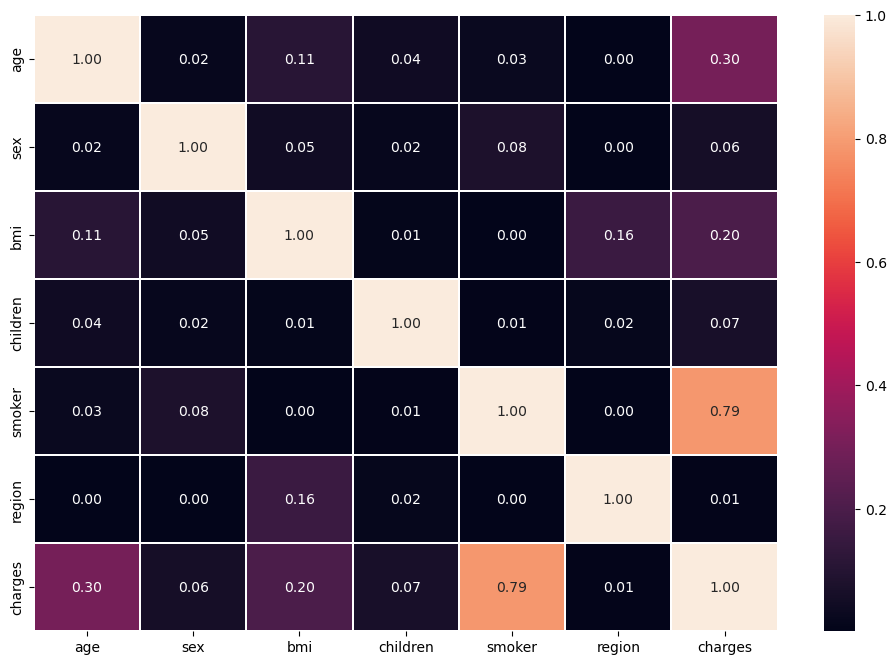

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = dt.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(dt_corr, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

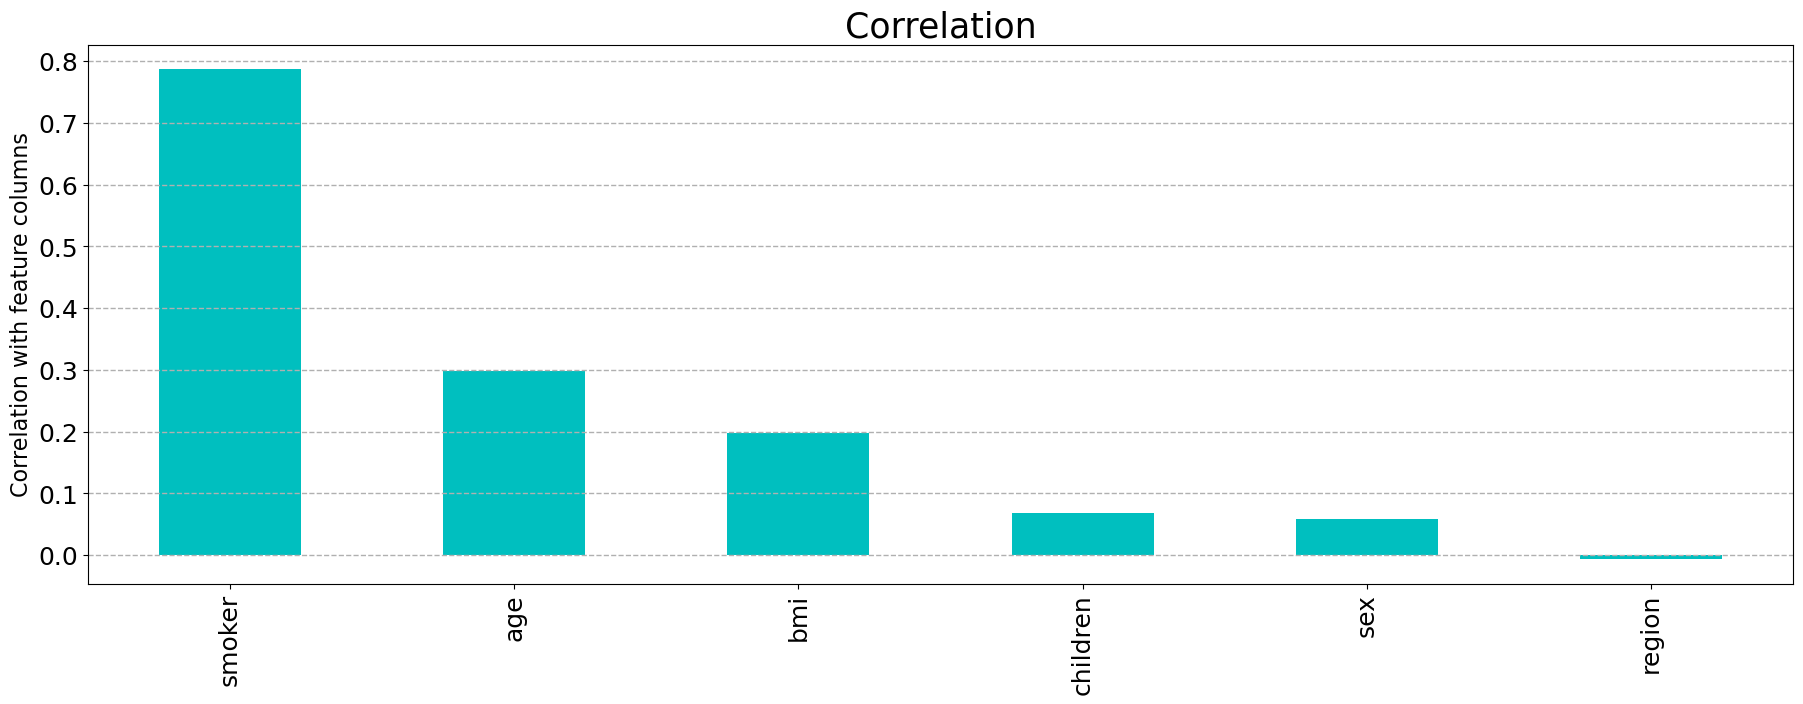

In [27]:
plt.figure(figsize=(22,7))
dt.corr()['charges'].sort_values (ascending=False).drop(['charges']). plot (kind='bar', color='c', fontsize=18)
plt.ylabel('Correlation with feature columns', fontsize=16)
plt.title('Correlation', fontsize=25)

plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1, which='both')

plt.show()

##### No multi-colinearity found

# 

# 

## Removing Outliners from Continuous data

In [28]:
dt.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [29]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

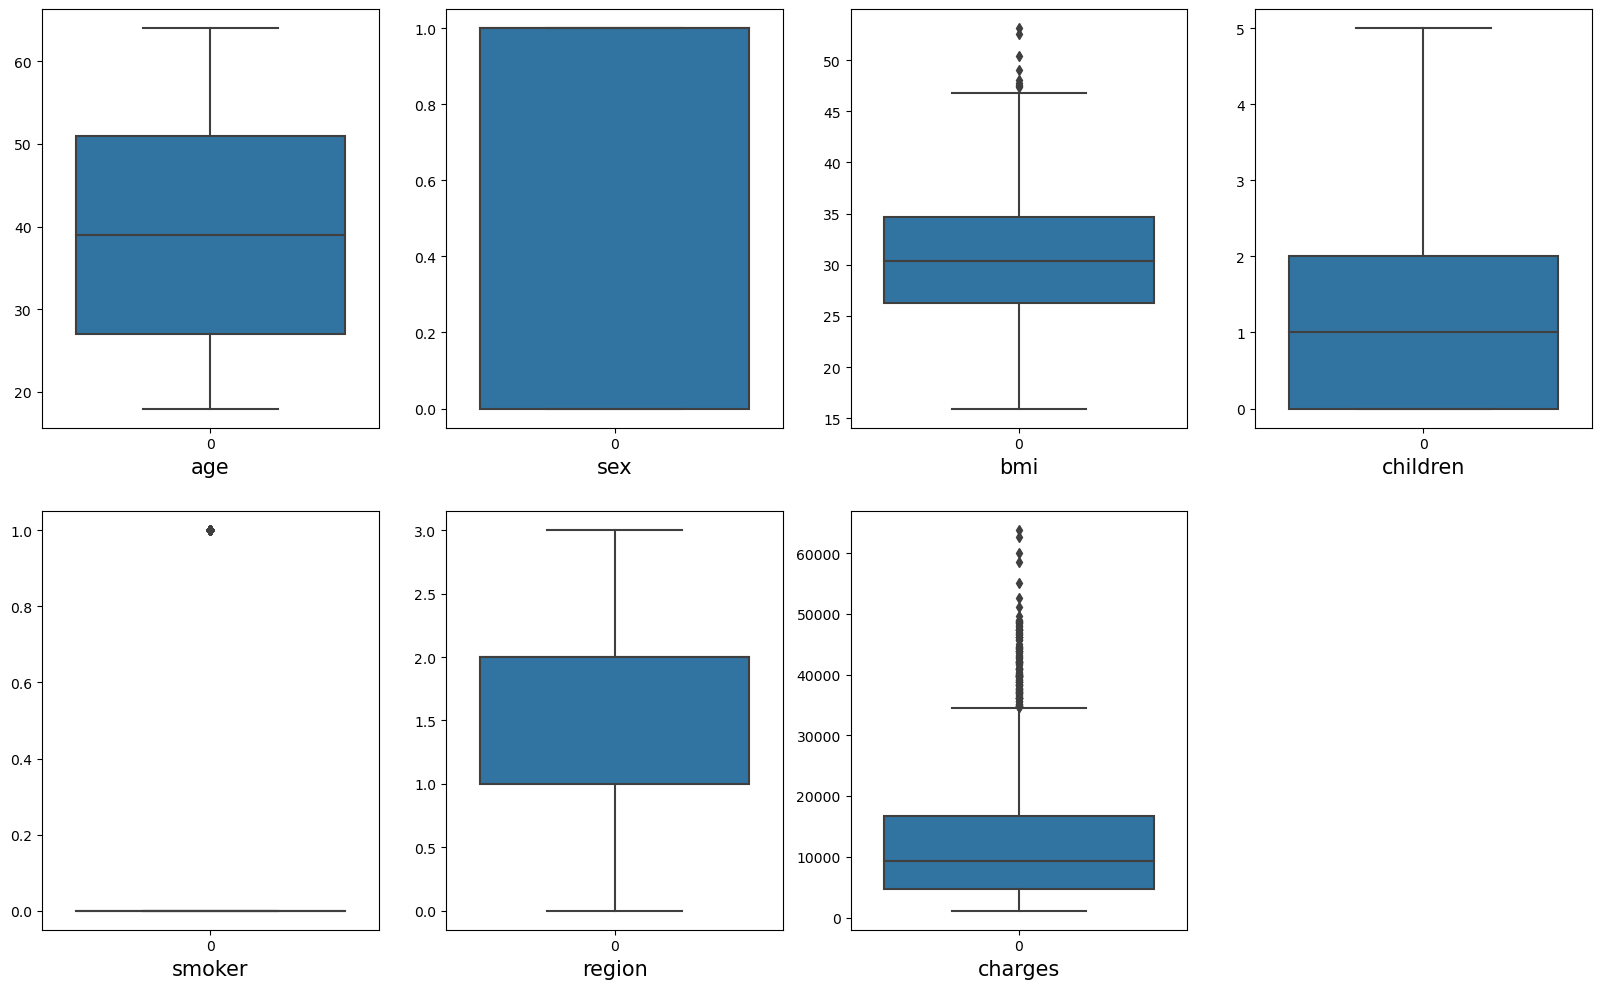

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in dt: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= dt[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

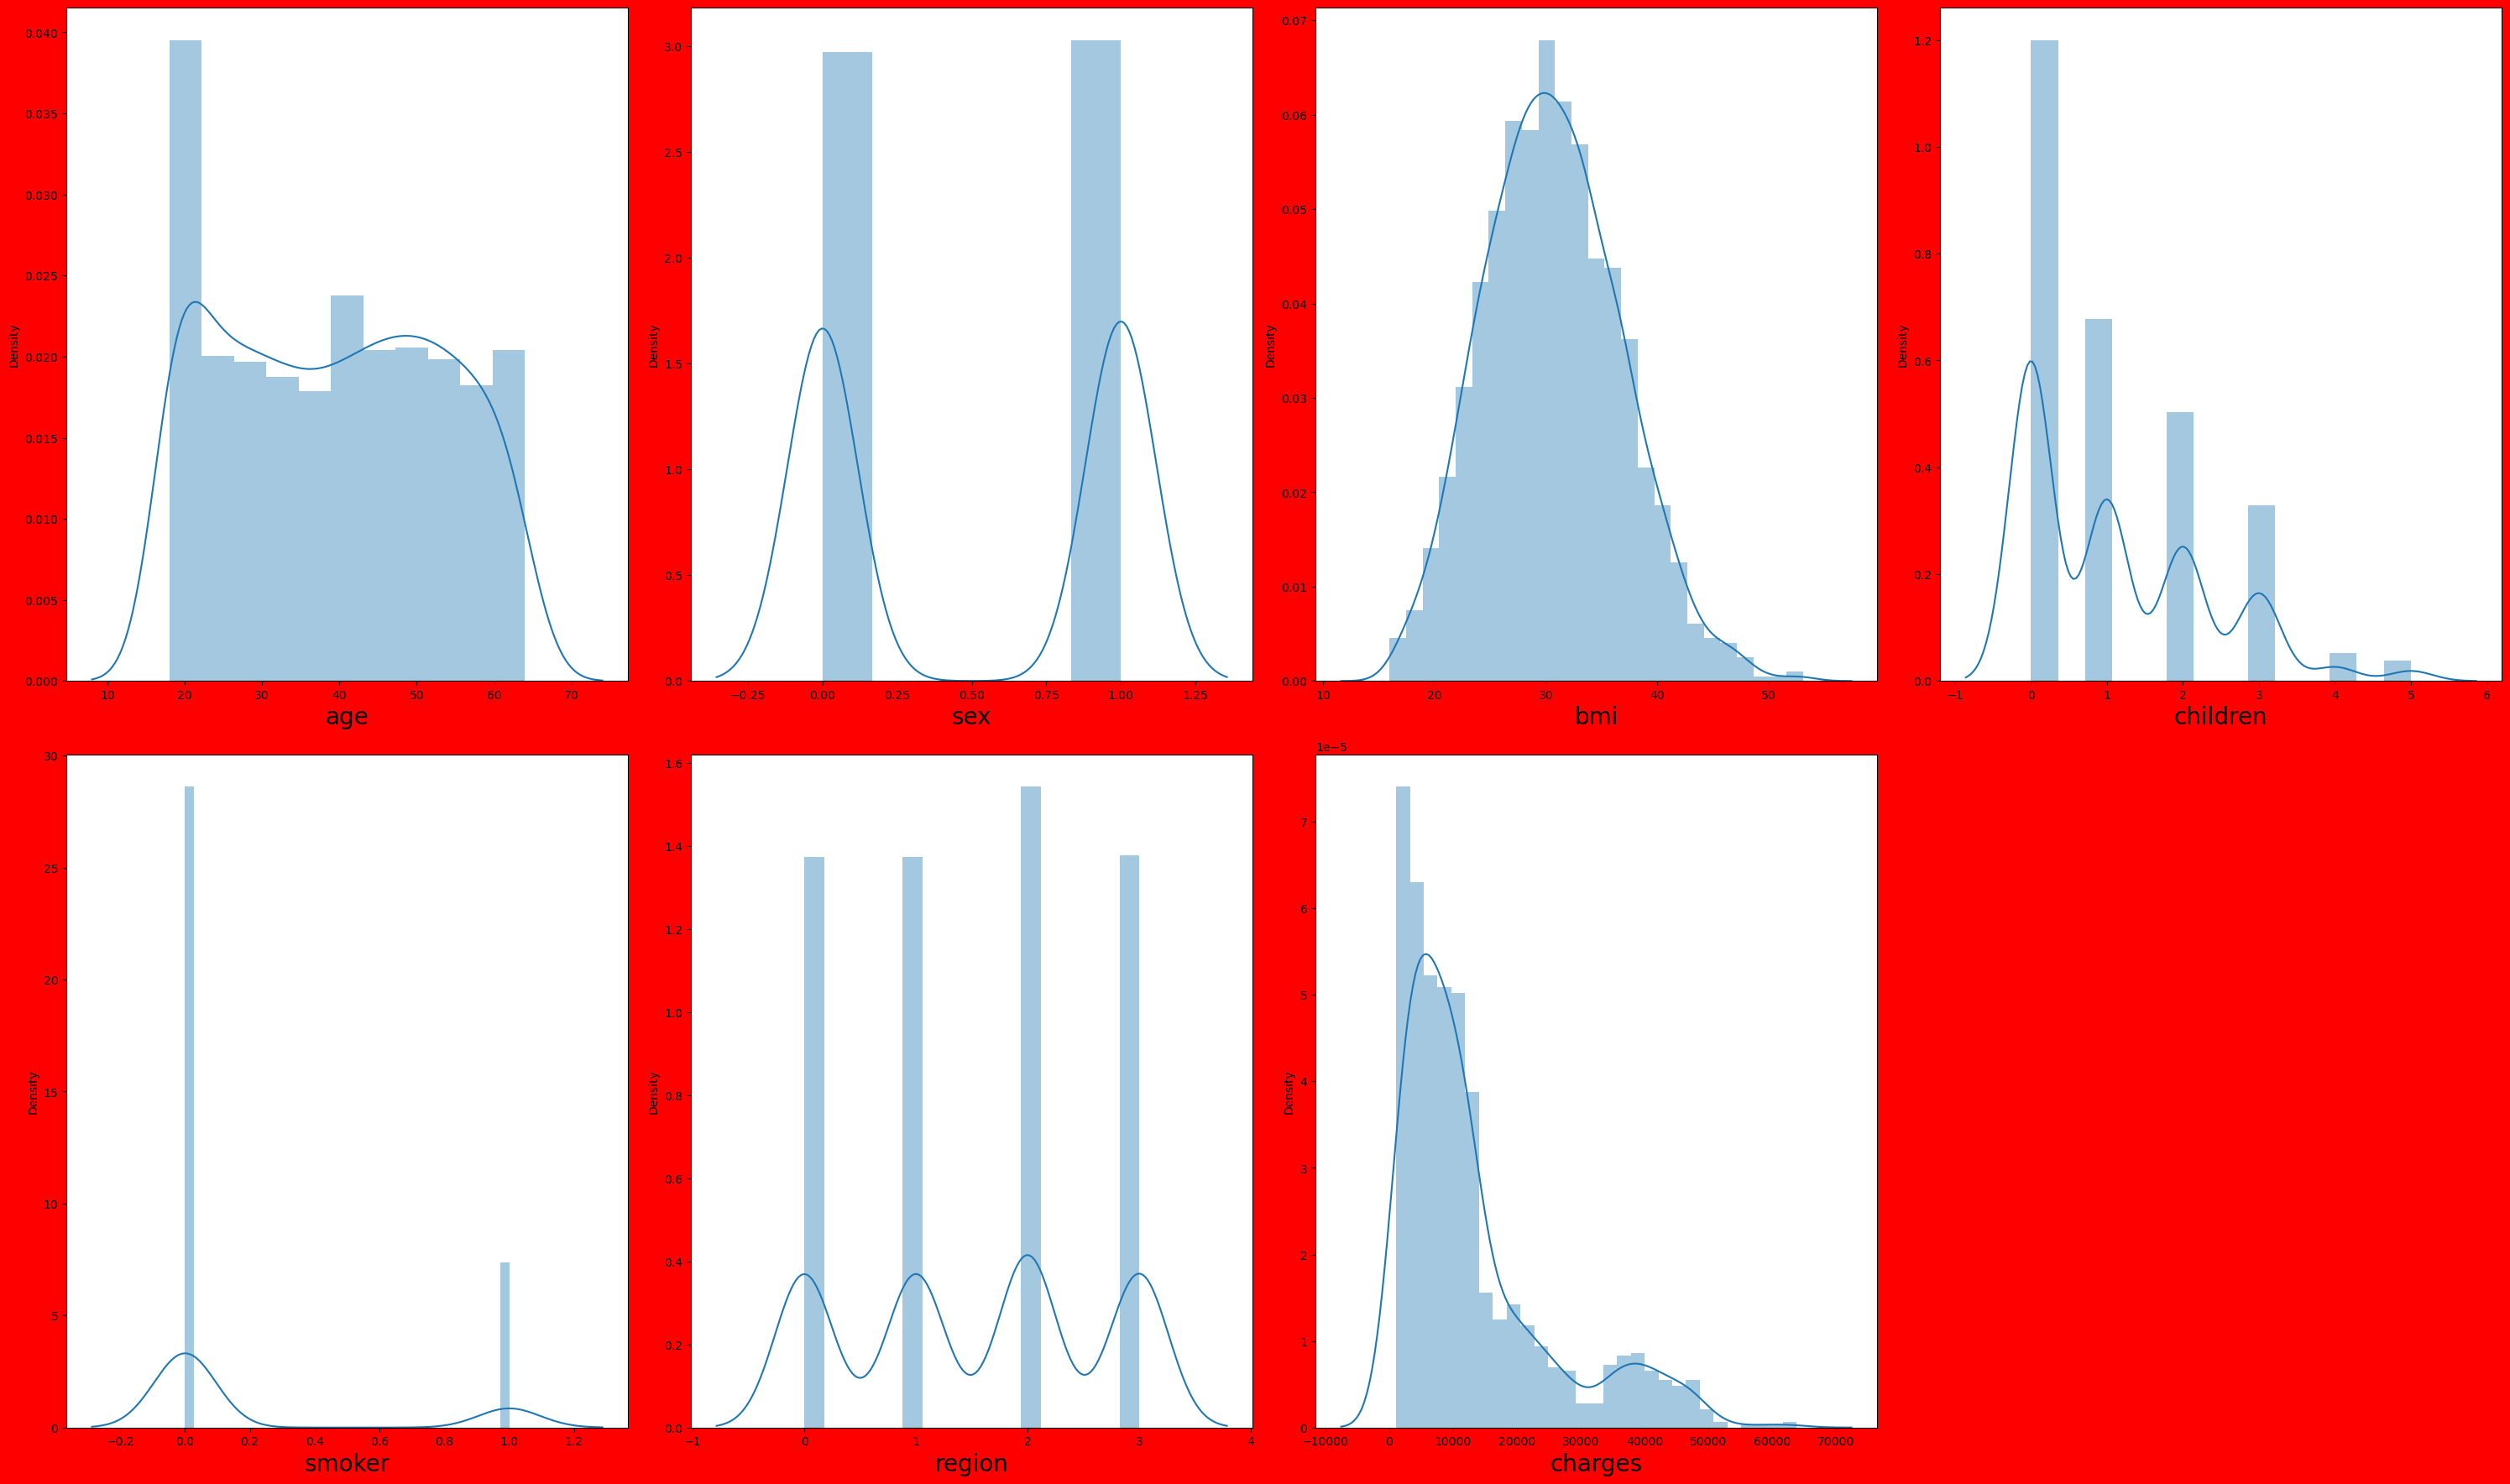

In [31]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in dt:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(dt[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout() 

##### No outliners in continuous data is found

# 

# 

## Removing Skewness from Continuous data

In [32]:
dt.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [33]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [34]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [35]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

##### Here columns 'age', 'bmi' & 'charges' are continuous data

In [36]:
dt.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

##### No high skewness found in Continuous data

# 

# 

## Separating Features & Label

In [37]:
x = dt.drop(columns=['charges'],axis=1)
y = dt.charges

In [38]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [39]:
y = y.ravel()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# 

## Standardizing Features

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

## Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

In [44]:
x_train

array([[-0.5144311 , -1.00977099, -0.17602803, -0.07944162, -0.50770174,
         0.43801727],
       [ 1.55123139, -1.00977099, -1.414101  , -0.90923416, -0.50770174,
        -1.37227359],
       [-1.44041773,  0.99032355, -0.99430407, -0.07944162, -0.50770174,
         1.34316271],
       ...,
       [-0.72812032,  0.99032355,  1.08664242,  0.75035092, -0.50770174,
         0.43801727],
       [-1.44041773,  0.99032355,  0.79803203, -0.90923416, -0.50770174,
        -0.46712816],
       [ 0.98139346,  0.99032355, -0.69749453,  0.75035092, -0.50770174,
        -1.37227359]])

In [45]:
y_train

array([ 4562.8421, 13616.3586,  1837.237 , ...,  4058.1161,  1646.4297,
       11244.3769])

# 

# 

# 

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Finding Co-efficient

In [47]:
reg.coef_

array([3431.61260608,   13.54704297, 1849.06031757,  584.44954786,
       9656.29674562, -444.33904365])

### Finding Intercept

In [48]:
reg.intercept_

13120.40242894665

### Checking accuracy on Training data

In [49]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.7517508031354458


### Printing the Predicted Values

In [50]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 5067.18698475  9472.11780987 11392.82711273 26359.09358364
  6934.67755949   735.72939063  1776.65426098 -1133.83617319
  1931.0351316  14233.95613731  9765.23682717 27102.86856473
 14358.72091476  9357.2055605   5329.00941402 10003.36671452
  5947.08701151  6116.53579987  4781.81048219 14634.75343737
  2498.95777733 12044.39984648  2080.24052087  4390.94798428
  4237.56442461  9052.20868128  1484.46961663 12265.8130125
  3975.55024527 30090.41300241  8927.03683044 38986.55639029
  8607.57426558 12972.0060822  25408.26568052 15549.82425232
 12408.04226212 30506.54080624  6929.89976524  3176.90089993
 27539.80780407  4180.85238001  5623.83396662 39297.16610237
 28088.78290433 11771.15362636 10708.40942819  9831.70108617
 13119.22360643  7056.61130434 33899.04421055  5199.54065545
 32848.19416825 33143.96557619 15478.22094939  3917.22930538
  5476.94456178  9252.2156309  11670.6116048  37947.44269971
 10159.88637535 24287.33327212  5755.4871492  15529.66123331
  5934.49152605  7963.615

### Checking accuracy on Testing data

In [51]:
reg.score(x_test,y_test)

0.7438474494767136

### Checking Error Score

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 40864653.719605416
RMSE 6392.546731906261
MAE 4376.907790239393


### Checking R2_Score

In [54]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.7438474494767136


### Actual vs Model predicted

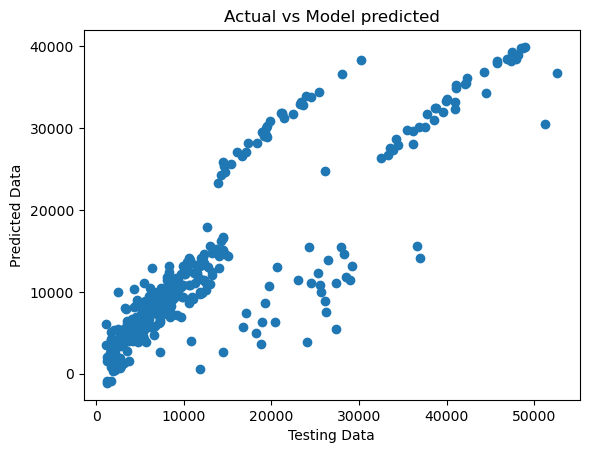

In [55]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [57]:
c1=cross_val_score (reg, x_train, y_train, cv=5)
c1

array([0.80560337, 0.65341027, 0.73298072, 0.76687243, 0.7594172 ])

In [58]:
c1.mean()

0.7436567970180394

In [59]:
c2=cross_val_score(reg, x_test, y_test, cv=5)
c2

array([0.78774375, 0.75719463, 0.60694825, 0.80806382, 0.6860237 ])

In [60]:
c2.mean()

0.7291948295201737

# 

# 

## DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
from sklearn.model_selection import GridSearchCV
dr = DecisionTreeRegressor()
param_grid = {"criterion":['squared_error','absolute_error','poisson'],
              'min_samples_split': [1,2,3,4,5,6], 
              'max_depth': [1,3,5,7,9,11,12],
              }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 2}

In [63]:
reg_dec = DecisionTreeRegressor(criterion='squared_error',min_samples_split=3,max_depth=5)
reg_dec.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3)

### Checking accuracy on Training data

In [64]:
print('Accuracy Score:',reg_dec.score(x_train,y_train))

Accuracy Score: 0.8845110436616919


### Printing the Predicted Values

In [65]:
y_pred = reg_dec.predict(x_test)
print(y_pred)

[ 3694.12177683  9124.56587357 11648.29201212 35087.0400315
  9198.7139525   4435.40524732  2116.82491679  2116.82491679
  2116.82491679 12523.97605092 10563.0906     19345.614388
 13783.90219655  9124.56587357  6031.35518863  4435.40524732
  6031.35518863  4435.40524732  9627.3493356  13783.90219655
  3694.12177683 12523.97605092  3694.12177683  3694.12177683
  3694.12177683  6031.35518863  6031.35518863  9124.56587357
  6031.35518863 35087.0400315   6702.3416202  46534.45305708
 12523.97605092 12523.97605092 19345.614388   14875.44233375
  9124.56587357 36862.14301    11648.29201212  3694.12177683
 35087.0400315   6031.35518863  9627.3493356  46534.45305708
 36862.14301    10563.0906      9124.56587357  6702.3416202
  9124.56587357  9627.3493356  24793.70264188  6031.35518863
 27175.774907   45612.24176167 12523.97605092  4435.40524732
  6031.35518863  9198.7139525  12523.97605092 45612.24176167
 14875.44233375 13288.663725    6031.35518863 14875.44233375
  6031.35518863  4435.405247

### Checking accuracy on Testing data

In [66]:
reg_dec.score(x_test,y_test)

0.8289398435808737

### Checking Error Score

In [67]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 27289652.369296446
RMSE 5223.9498819663695
MAE 3024.8499858032214


### Checking R2_Score

In [68]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.8289398435808737


### Actual vs Model predicted

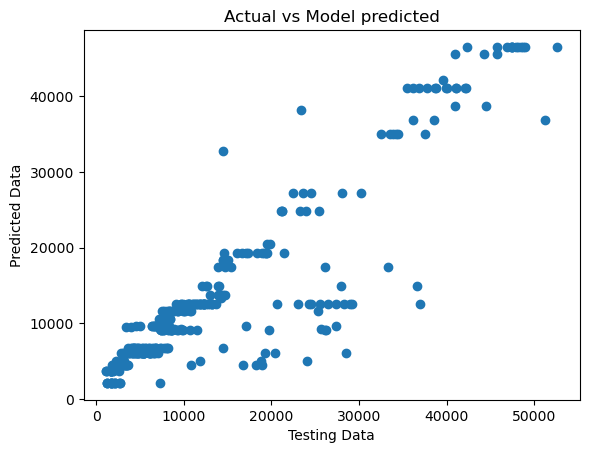

In [69]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [70]:
from sklearn.model_selection import KFold, cross_val_score

In [71]:
c3=cross_val_score(reg_dec, x_train, y_train, cv=5)
c3

array([0.8789585 , 0.74712018, 0.80003952, 0.86327229, 0.85944146])

In [72]:
c3.mean()

0.8297663917961471

In [73]:
c4=cross_val_score(reg_dec, x_test, y_test, cv=5)
c4

array([0.84023017, 0.77587878, 0.55912055, 0.88645438, 0.61588272])

In [74]:
c4.mean()

0.7355133188501798

# 

# 

## Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
reg_rf = RandomForestRegressor(n_estimators=50,criterion='squared_error',min_samples_split=15,max_depth=6)
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_split=15, n_estimators=50)

### Checking Accuracy Score on Training data

In [77]:
print('Accuracy Score:',reg_rf.score(x_train,y_train))

Accuracy Score: 0.9000512246638629


### Printing the Predicted Values

In [78]:
y_pred = reg_rf.predict(x_test)
print(y_pred)

[ 3022.18393691 10721.92588779 10578.15959775 35022.60072337
 10224.63165467  7537.24084469  2724.55328571  2184.46223967
  3774.71735467 12388.5149607  10406.65077681 18143.50943108
 14503.7105061  10387.44571925  5897.09477174  5805.09596731
  5451.91945238  5765.79232414  7681.65260727 14092.26305992
  3031.64447152 14519.01965929  2840.60217141  4006.52695317
  3271.87745977  6920.5996806   7607.36354716 10085.56568092
  4636.8246053  36604.62863386  7216.69157072 45831.8881782
 12549.54472772 12050.4140481  18641.13250673 15127.97278512
  9448.16479136 37040.25340645  9976.80091654  3279.92199087
 35022.60072337  4525.02824051  8497.33065164 46938.79220408
 36788.84085231 10515.74333774 10730.4238351   7220.01173506
  9766.00616208  8257.61299688 24003.67143465  4869.94872009
 27635.01583845 41949.93226194 12227.74332958  4629.14561427
  5597.41568119 10130.63756545 12273.04289904 45068.38128982
 15135.58251441 16619.20665859  5500.755989   14508.40523255
  5129.90993043  6063.257

### Checking accuracy on Testing data

In [79]:
reg_rf.score(x_test,y_test)

0.8488761095803123

### Checking Error Score

In [80]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 24109170.250868574
RMSE 4910.1089856406015
MAE 2813.7600655868346


### Checking R2_Score

In [81]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.8488761095803123


### Actual vs Model predicted

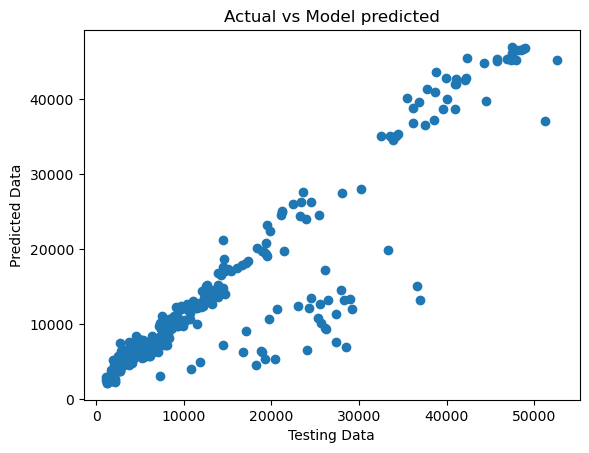

In [82]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [83]:
from sklearn.model_selection import KFold, cross_val_score

In [84]:
c5=cross_val_score (reg_rf, x_train, y_train, cv=5)
c5

array([0.89095303, 0.79676096, 0.81462919, 0.87997972, 0.87513832])

In [85]:
c5.mean()

0.8514922438443696

In [86]:
c6=cross_val_score(reg_rf, x_test, y_test, cv=5)
c6

array([0.89088746, 0.84078471, 0.75256475, 0.88354335, 0.78365175])

In [87]:
c6.mean()

0.830286404658694

# 

# 

## KNeighbors Regressor

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 9}

In [90]:
reg_KN = KNeighborsRegressor(algorithm= 'kd_tree', leaf_size = 5, n_neighbors = 7)

reg_KN.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=5, n_neighbors=7)

### Checking Accuracy Score on Training data¶

In [91]:
print('Accuracy Score:',reg_KN.score(x_train,y_train))

Accuracy Score: 0.8588854942285122


### Printing the Predicted Values

In [92]:
y_pred = reg_KN.predict(x_test)
print(y_pred)

[ 3596.01403571  8092.00497143  9465.64562143 24479.82507143
 11462.14548571  7551.08176429  5288.79277143  1911.02168571
  3242.58271429 11943.01934286  9649.57648143 22256.21197143
 14701.26617286  8226.9708      6192.147       4310.08569571
  5928.48411429  6871.79219286  6736.6141     12576.48219286
  3398.39523571 15176.11793857  4693.83033286  4190.18042429
  1519.65045714  6424.84037857  3393.73427143 10438.76406143
  6676.71903429 35792.83745     9050.23955    44932.79535714
 10165.48       12292.80505714 18537.94212143 16970.10731
 11732.43750714 38522.37231     7312.5095      2194.17871429
 26966.80426857  4664.29698714 11047.96155857 47690.65143857
 39569.40956714 10656.24120286 13882.73495143 10282.75948
 10129.89124286  7697.16280714 26088.16110571  3225.78245714
 29295.32858571 40353.59896429 12089.59642857  2521.97185
  4297.58312143 12820.34426571 11876.41998857 47367.60547429
 11548.55780714 20582.61902857  5976.25167429 12295.76861429
  2928.11027143  3363.45542857  2

### Checking accuracy on Testing data

In [93]:
reg_KN.score(x_test,y_test)

0.8122010232112182

### Checking Error Score

In [94]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 29960038.03082224
RMSE 5473.576347400503
MAE 3477.627544022601


### Checking R2_Score

In [95]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.8122010232112182


### Actual vs Model predicted

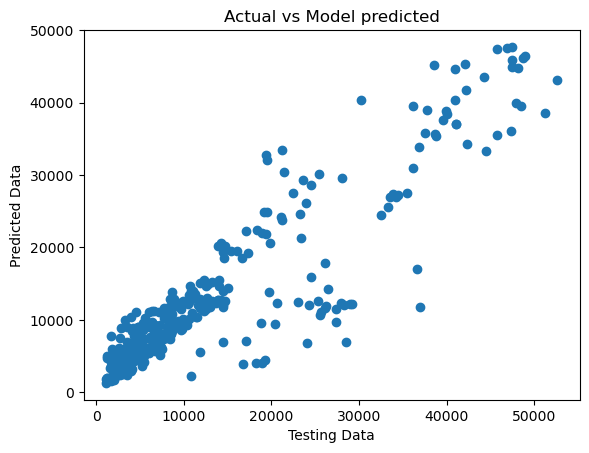

In [96]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [97]:
from sklearn.model_selection import KFold, cross_val_score

In [98]:
c7=cross_val_score (reg_KN, x_train, y_train, cv=5)
c7

array([0.82971411, 0.75890734, 0.78161643, 0.82928554, 0.81412458])

In [99]:
c7.mean()

0.8027295992117562

In [100]:
c8=cross_val_score(reg_KN, x_test, y_test, cv=5)
c8

array([0.81657676, 0.80279103, 0.72007525, 0.84082361, 0.76991031])

In [101]:
c8.mean()

0.7900353938002963

# 

# 

## SVR

In [102]:
from sklearn.svm import SVR

In [103]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)

In [104]:
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [105]:
reg_SVR = SVR(C=10000, gamma= 0.1, kernel= 'rbf')

reg_SVR.fit(x_train, y_train)

SVR(C=10000, gamma=0.1)

### Checking Accuracy Score

In [106]:
print('Accuracy Score:',reg_SVR.score(x_train,y_train))

Accuracy Score: 0.8440587070713242


### Printing the Predicted Values

In [107]:
y_pred = reg_SVR.predict(x_test)
print(y_pred)

[ 1667.70231428  8513.88771172  9290.84657559 23385.46766529
  9710.72534567  2751.02039553  2215.75489289  1388.16253103
  2684.18500777 12233.79917901  8249.87826326 19466.27269779
 13931.63667953  8192.01571244  5456.14211525  2865.40087952
  5273.29583052  3462.83614612  6684.71101542 14661.6297473
  1625.43400849 13248.93431276  1267.43248951  2639.79136878
  1668.65262406  4638.2024918   3872.01750115 11391.91259402
  3756.47142663 34125.20456986  8057.6309598  49745.29407105
 10595.04228352 10231.29932133 13624.16416497 15311.63815354
  8349.38379133 38207.96016391  8442.74037842  1889.1213541
 25240.35971385  2880.08356497  4621.81274377 49947.71093465
 34396.21749077  8121.39495778 10735.22311321  7690.32523127
  9894.5073446   7170.10693573 25476.03474705  4133.44338484
 29884.96900415 42582.50507031 11856.14699976  3061.20238685
  3188.29162259  8811.86197431  9133.52838463 50906.54444826
 12429.64265835 13263.36379133  4276.49653637 14247.27193378
  3941.04258837  3208.1686

### Checking accuracy on Testing data

In [108]:
reg_SVR.score(x_test,y_test)

0.8250988873582682

### Checking Error Score

In [109]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 27902409.67219384
RMSE 5282.273153879288
MAE 2237.3392665570595


### Checking R2_Score

In [110]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.8250988873582682


### Actual vs Model predicted

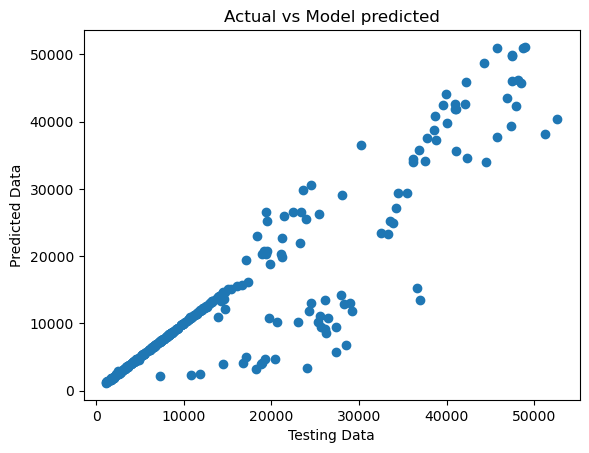

In [111]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [112]:
from sklearn.model_selection import KFold, cross_val_score

In [113]:
c9=cross_val_score (reg_SVR, x_train, y_train, cv=5)
c9

array([0.88449071, 0.7868025 , 0.80449269, 0.86246789, 0.8394503 ])

In [114]:
c9.mean()

0.8355408169101042

In [115]:
c10=cross_val_score(reg_SVR, x_test, y_test, cv=5)
c10

array([0.86528683, 0.80706879, 0.73112601, 0.83626337, 0.78046806])

In [116]:
c10.mean()

0.8040426116214412

# 

# 

## Lasso Regression

In [117]:
from sklearn.linear_model import Lasso, LassoCV

In [118]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)   

lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [119]:
alpha = lasscv.alpha_
alpha

1.295094682847476

In [120]:
reg_lasso = Lasso(alpha)      # Passing Learning rate/speed to LASSO
reg_lasso.fit(x_train,y_train)

Lasso(alpha=1.295094682847476)

### Checking Accuracy Score

In [121]:
print('Accuracy Score:',reg_lasso.score(x_train,y_train))

Accuracy Score: 0.751750733651105


### Printing the Predicted Values

In [122]:
y_pred = reg_lasso.predict(x_test)
print(y_pred)

[ 5070.3449145   9474.30153799 11389.40059655 26358.94010162
  6938.75531164   739.63830545  1780.19880176 -1127.1462259
  1934.9891494  14233.25676006  9767.92316332 27102.87021205
 14355.11341573  9358.54839089  5334.2317661  10000.42001478
  5950.37623847  6114.73067121  4781.61379708 14634.36513565
  2504.04800271 12047.02016016  2084.51224694  4391.0773088
  4239.47476113  9048.80742727  1489.25504121 12264.65941952
  3980.8568687  30084.6465474   8926.62928503 38978.92747497
  8610.71280738 12971.75878866 25409.52918416 15547.0015529
 12405.01369247 30504.60931925  6930.67144358  3182.72982845
 27536.77894142  4183.52011983  5624.05870557 39288.97365593
 28089.50613393 11770.15263907 10708.72722168  9831.65745272
 13120.1162957   7054.90730426 33894.19849286  5201.7351282
 32846.54295502 33140.24749947 15477.62997395  3917.80204685
  5480.81524495  9252.1673909  11669.99257834 37939.2447155
 10159.98072123 24288.82751867  5755.50875949 15526.23910506
  5936.03092836  7964.6875409

### Checking accuracy on Testing data

In [123]:
reg_lasso.score(x_test,y_test)

0.7438351331140518

### Checking Error Score

In [124]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 40866618.57958524
RMSE 6392.700413720734
MAE 4376.796745396159


### Checking R2_Score

In [125]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.7438351331140518


### Actual vs Model predicted

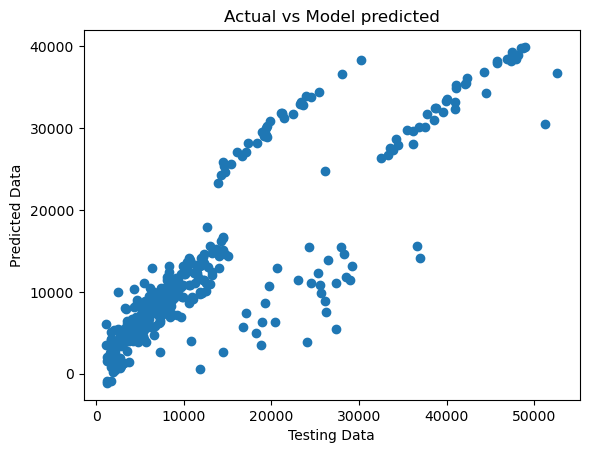

In [126]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [127]:
from sklearn.model_selection import KFold, cross_val_score

In [128]:
c11=cross_val_score (reg_lasso, x_train, y_train, cv=5)
c11

array([0.80559206, 0.65345432, 0.73297945, 0.76687512, 0.75941179])

In [129]:
c11.mean()

0.7436625484938441

In [130]:
c12=cross_val_score(reg_lasso, x_test, y_test, cv=5)
c12

array([0.78769625, 0.75718061, 0.60701357, 0.80809182, 0.68601904])

In [131]:
c12.mean()

0.7292002578986034

# 

# 

## Ridge Regression Regularization

In [132]:
from sklearn.linear_model import Ridge, RidgeCV

In [133]:
ridgecv = RidgeCV(alphas = np.arange(1,100,10), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), normalize=True)

In [134]:
alpha = ridgecv.alpha_
alpha

1

In [135]:
reg_rid = Ridge(alpha=ridgecv.alpha_)           # Passing Learning rate/speed to Ridge
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

### Checking Accuracy Score

In [136]:
print('Accuracy Score:',reg_rid.score(x_train,y_train))

Accuracy Score: 0.7517500213005067


### Printing the Predicted Values

In [137]:
y_pred = reg_rid.predict(x_test)
print(y_pred)

[ 5074.73829333  9475.29037236 11394.97182289 26345.60188147
  6939.77307241   748.17842177  1787.02307941 -1119.22809161
  1941.6402879  14232.06099611  9767.85825552 27088.55838543
 14357.57850137  9360.79524045  5336.40885972 10007.53925497
  5953.3656387   6124.03662599  4790.62363937 14632.37962625
  2508.92714045 12045.07134221  2091.82246571  4400.28134151
  4246.9242324   9056.84418624  1494.94468642 12267.49485551
  3983.90985571 30074.0257856   8931.2170287  38961.15183022
  8612.38581821 12972.72529366 25394.20924402 15547.81291944
 12409.82065765 30489.39078774  6936.42051322  3186.33849848
 27524.90693174  4190.14739002  5630.96202724 39271.21059542
 28072.58461227 11772.96447435 10710.88387589  9835.16982563
 13119.03509092  7063.2489078  33878.2893693   5206.48411969
 32828.50172611 33123.57989108 15475.29460665  3926.52568074
  5483.94122488  9256.24093355 11672.46646129 37922.92684049
 10162.66942642 24274.43353146  5763.38379409 15528.64584763
  5940.75989976  7968.57

### Checking accuracy on Testing data

In [138]:
reg_rid.score(x_test,y_test)

0.7438196397525192

### Checking Error Score

In [139]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 40869090.27409966
RMSE 6392.893732426628
MAE 4378.59579044231


### Checking R2_Score

In [140]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.7438196397525192


### Actual vs Model predicted

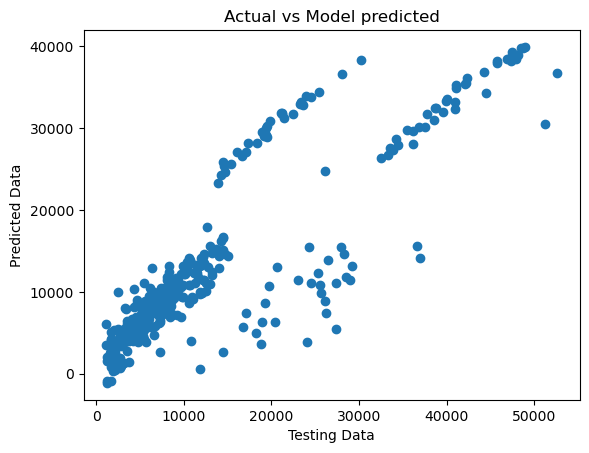

In [141]:
plt.scatter(y_test, y_pred) 
plt.xlabel('Testing Data') 
plt.ylabel('Predicted Data') 
plt. title('Actual vs Model predicted') 
plt.show()

### Cross - validation

In [142]:
from sklearn.model_selection import KFold, cross_val_score

In [143]:
c13=cross_val_score (reg_rid, x_train, y_train, cv=5)
c13

array([0.80548081, 0.65371221, 0.73294644, 0.76691954, 0.7592754 ])

In [144]:
c13.mean()

0.743666879502345

In [145]:
c14=cross_val_score(reg_rid, x_test, y_test, cv=5)
c14

array([0.78709729, 0.75689096, 0.60797558, 0.80781832, 0.68649253])

In [146]:
c14.mean()

0.7292549378491057

# 

# 

## Saving the Top 3 Best Models

In [147]:
import pickle 

In [148]:
with open('reg_KN', 'wb') as f: 
    pickle.dump(reg_KN, f)

In [149]:
with open('reg_rf', 'wb') as f: 
    pickle.dump(reg_rf, f)

In [150]:
with open('reg_SVR', 'wb') as f: 
    pickle.dump(reg_SVR, f)

# 

## Opening the Saved Models 

In [151]:
with open('reg_KN', 'rb') as f:
    l1 = pickle.load(f)

In [152]:
with open('reg_rf', 'rb') as f:
    l2 = pickle.load(f)

In [153]:
with open('reg_SVR', 'rb') as f:
    l3 = pickle.load(f)

# 

## Prediction

In [154]:
l1.predict(scaler.transform([[19,0,27.900,0,1,3]]))

array([22531.43709])

In [155]:
l2.predict(scaler.transform([[19,0,27.900,0,1,3]]))

array([17316.40137786])

In [156]:
l3.predict(scaler.transform([[19,0,27.900,0,1,3]]))

array([18959.06940477])

# 

# 